In [82]:
import Quaternion_helper
import importlib
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np


%matplotlib widget


#helper functions
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

def create3dPlot(title):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    return fig, ax

def showPoint(ax, point, description, color):
    ax.scatter([point.x], [point.y], [point.z], color)
    ax.text(point.x, point.y, point.z, f"{description}: {point}", color=color)



# What is a Quaternion

A quaternion is compose of one real number and 3 imaginary numbers

We can onften see it in this form :

``` a + bi + cj + dk ``` 

Where 
 - i j and k are the imaginary numers and 
 - a b c d are the coefficients (a is the real number).


We can define a quaternion with the library with ``` Quaternion(a, b, c, d) ``` 

For example :



In [74]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion


myQuaternion = Quaternion(3, 5, 20, 3)
print(myQuaternion)


(3 + 5i + 20j + 3k)


# Add and Substract Two Quaternion

It is possible to add and substract two quaternions.

Let 2 quaternions w and x

 - ``` w = a + bi + cj + dk ```
 - ``` x = e + fi + gj + hk ```

Then, 

- ``` w + x = (a + bi + cj + dk) + (e + fi + gj + hk) ```
- ``` w + x = = (a+e) + (b+f)i + (c+g)j + (d+h)k ```


The same thing applies to the substraction

For example:


In [75]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Quaternion

w = Quaternion(10, 20, 30, 40)
x = Quaternion(6, 7, 8, 9)
y = w + x
z = w - x

print(y)
print(z)

(16 + 27i + 38j + 49k)
(4 + 13i + 22j + 31k)


# Representation of a 3D Point With Quaternions

A 3d point can be represented with the imaginary part of a quaternion. The real part is 0

For example, the point (5, 3, 10) in the 3d space could be represented by 0 + 5i + 3j + 10k

Fuerthermore, the same operators can be applied to this 3d point

Code example:

Point 1: (10, 10, 10)
Point 2: (25, 30, 20)
Point 1 + Point 2 : (35, 40, 30)
Point 1 - Point 2 : (35, 40, 30)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
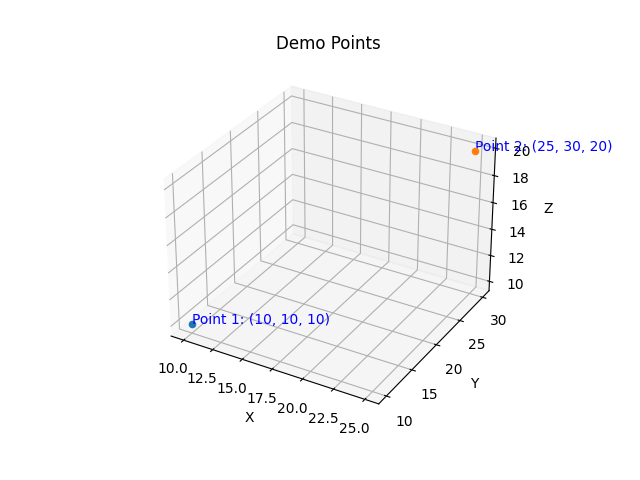

In [104]:
importlib.reload(Quaternion_helper)
from Quaternion_helper import Point3D

myPoint1 = Point3D(10, 10, 10)
myPoint2 = Point3D(25, 30, 20)
myPoint3 = myPoint1 + myPoint2
myPoint4 = myPoint1 - myPoint2


print(f"Point 1: {myPoint1}")
print(f"Point 2: {myPoint2}")
print(f"Point 1 + Point 2 : {myPoint3}")
print(f"Point 1 - Point 2 : {myPoint4}")


# show points 1 and 2 in 3d
fig, ax = create3dPlot("Demo Points")
showPoint(ax, myPoint1, "Point 1", "blue")
showPoint(ax, myPoint2, "Point 2", "blue")

plt.show()


# 

In [94]:
plt.close('all')